In [1]:
from __future__ import annotations
from ga_regression import *
from ga_dataset import *
from ga_population import *
from seagullmesh import Mesh3

C:\Users\dg\.conda\envs\diffnet4\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
models = SourceModels.current_trained()

In [4]:
n = 5
best_imgs = models.cp_l2_mag.sort_values(ascending=False).head(n).index
best_imgs

Index(['JC0L219A2_GreyTabbyCat_Trot_v4_orig_Main.png',
       'JF0N2N0B_VervetMonkeys_Run_v4_orig_Main.png', '20220705_SD05_0546.JPG',
       'JU0L219A1_SnowshoeHare_Summer_Jump_v4_A_orig_Main.png',
       '20220308_SD02_3022.JPG'],
      dtype='object', name='filename')

In [5]:
tgt_mesh = pv.read(r"D:\mesh_extract_work\GreyTabbyCat\JC0L219A2_GreyTabbyCat_Blender\JC0L219A2_GreyTabbyCat_Blender\JC0L219A2_GreyTabbyCat_Trot_v4.mesh_extraction2.ply")
sm = Mesh3.from_pyvista(tgt_mesh)
sm_wrapped = sm.alpha_wrapping(alpha=0.005, offset=0.001)
probe_mesh = ProbeMesh(sm_wrapped.to_pyvista(), cam_pos=(-.194, -.869, 0.339), cam_tgt=(0.000229, -0.371, 0.1145))
probe_meshes = [probe_mesh.scale_camera_dist(s) for s in np.linspace(1.5, 0.25, 20)]

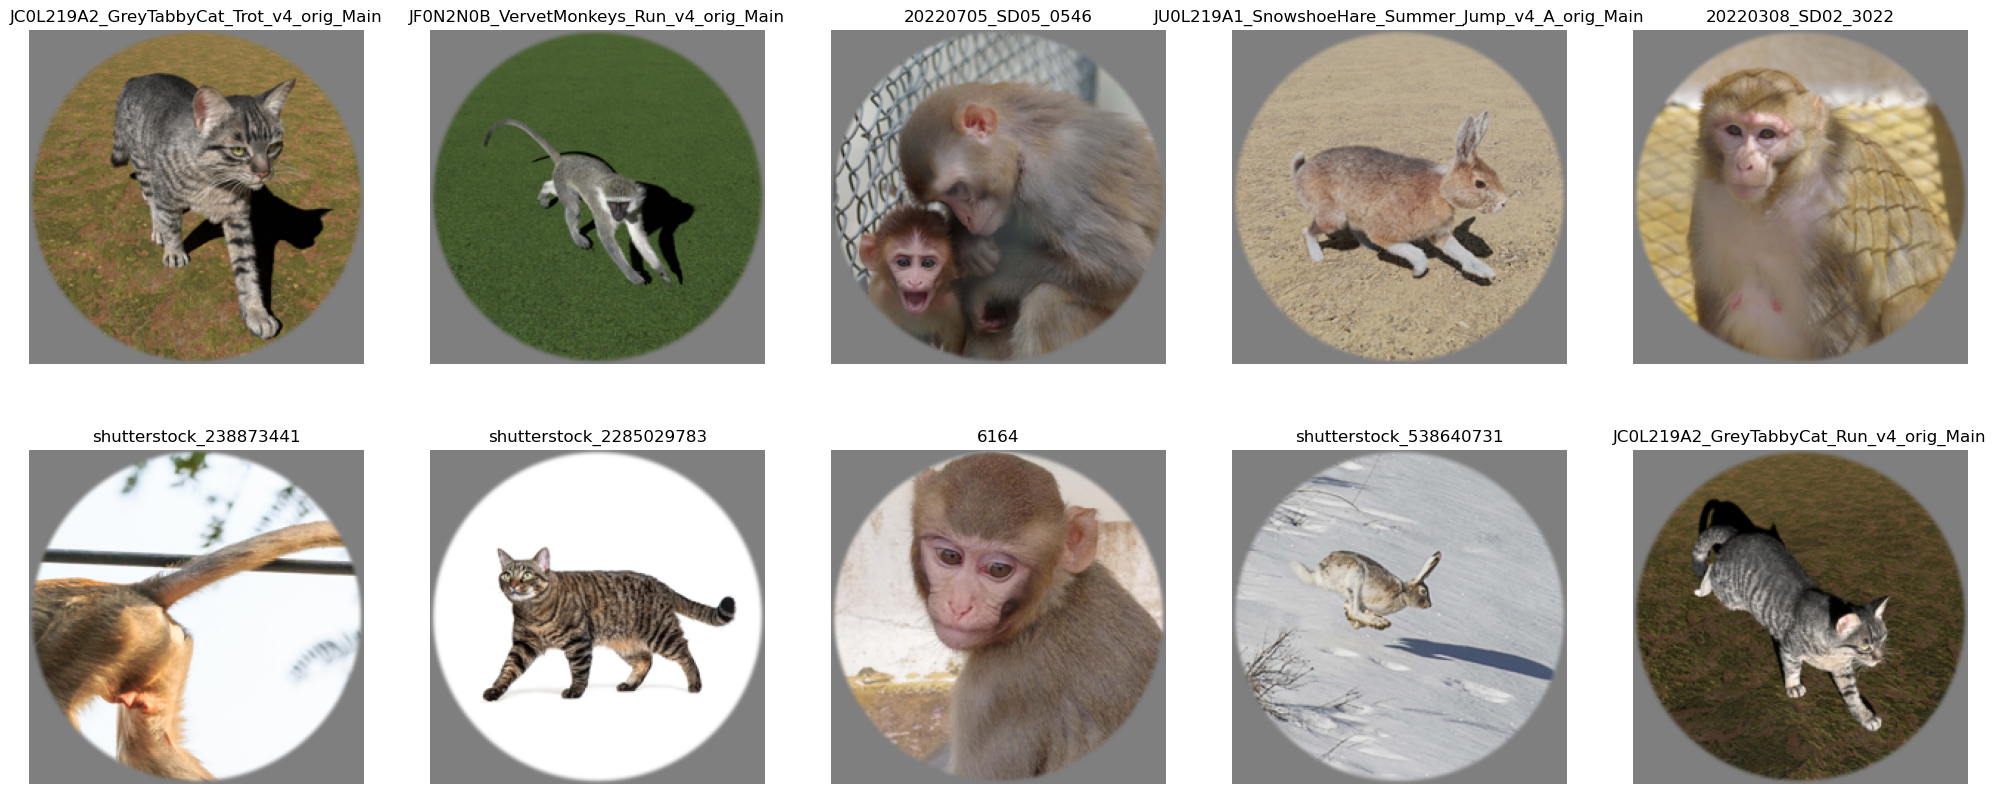

In [22]:
models.plot_best_cp_images()

In [7]:
# tgt_mesh.plot()

In [8]:
# probe_mesh.render()

In [21]:
### WHY DOES THIS TAKE SO LONG
self = models
n_mesh = len(probe_meshes)
out = []
for i, tm in enumerate(tqdm(self.models)):
    with tm:
        expt = tm.reader.experiment()
        n_channel = len(expt.metadata.channel)
        preds = np.full((n_mesh, n_channel), np.nan)
        expt.model.eval()

        with torch.no_grad():
            for j, pm in enumerate(probe_meshes):
                pass
                # md = pm.mesh_data()
    #             _, preds_j, _ = expt.load_item(md)
    #             preds[j, :] = preds_j.cpu().numpy()

    #     if correct_channels:
    #         preds = tm.correct_predictions(preds)

    # tuples = [(i, j) for j in range(n_channel)]
    # columns = pd.MultiIndex.from_tuples(tuples, names=["model_idx", "channel_idx"])
    # out.append(pd.DataFrame(preds, columns=columns))

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:10<00:00,  1.69s/it]


In [17]:
df_preds = models.get_predictions(probe_meshes, correct_channels=True)
df_preds

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [06:10<00:00, 61.76s/it]


model_idx           0                                                    \
channel_idx        0         1         2         3         4         5    
0            0.493442  0.186655  0.041870  0.567971  0.277922  0.330994   
1            0.499424  0.184964  0.040671  0.569295  0.271113  0.334053   
2            0.504725  0.183252  0.039155  0.568795  0.266502  0.337503   
3            0.508850  0.181684  0.037318  0.566031  0.263863  0.341509   
4            0.510680  0.179980  0.035127  0.559316  0.262467  0.345646   
5            0.509537  0.178648  0.032477  0.548190  0.263300  0.350296   
6            0.504416  0.177654  0.029547  0.532477  0.266446  0.355433   
7            0.494327  0.177681  0.026508  0.513611  0.273220  0.361708   
8            0.479370  0.180074  0.023377  0.493400  0.285130  0.369669   
9            0.460907  0.184190  0.020384  0.471110  0.299397  0.376833   
10           0.438728  0.190010  0.017659  0.446837  0.315962  0.382026   
11           0.413086  0.197508  0.014831  0.420999  0.335856  0.386313   
12           0.383807  0.204639  0.011537  0.391330  0.356050  0.389765   
13           0.350213  0.209792  0.007615  0.355981  0.373474  0.392703   
14           0.317035  0.212974  0.003397  0.318226  0.387871  0.395939   
15           0.288835  0.213749 -0.000789  0.284045  0.399026  0.399426   
16           0.267266  0.213378 -0.004534  0.258270  0.407681  0.403036   
17           0.251260  0.213234 -0.008329  0.239565  0.415094  0.407084   
18           0.239008  0.213925 -0.012682  0.224330  0.421724  0.412055   
19           0.229255  0.215581 -0.017546  0.210913  0.428738  0.419487   

model_idx                                            ...         5            \
channel_idx        6         7         8         9   ...        4         5    
0            0.237052  0.163962  0.144695  0.067821  ...  0.228184  0.214182   
1            0.242799  0.170222  0.147655  0.071723  ...  0.230524  0.215674   
2            0.248581  0.174594  0.151769  0.075994  ...  0.232555  0.217628   
3            0.254288  0.176965  0.156805  0.080475  ...  0.232809  0.218001   
4            0.259603  0.176964  0.162720  0.085112  ...  0.231277  0.216951   
5            0.264097  0.174077  0.169454  0.090303  ...  0.227802  0.214048   
6            0.267071  0.168035  0.177423  0.096032  ...  0.221267  0.207578   
7            0.267342  0.158111  0.187364  0.102391  ...  0.212738  0.198173   
8            0.264309  0.143872  0.199248  0.109193  ...  0.202726  0.186219   
9            0.258761  0.126618  0.211952  0.115206  ...  0.189231  0.168186   
10           0.250675  0.106390  0.225550  0.119878  ...  0.171894  0.143569   
11           0.240089  0.083781  0.240395  0.123451  ...  0.155405  0.120463   
12           0.227352  0.060676  0.256159  0.125925  ...  0.144030  0.108101   
13           0.212720  0.039007  0.271710  0.127927  ...  0.136645  0.106687   
14           0.198910  0.021378  0.286561  0.129810  ...  0.128663  0.112498   
15           0.187623  0.009376  0.300685  0.130429  ...  0.120570  0.122536   
16           0.178997  0.002057  0.313733  0.129651  ...  0.116397  0.135538   
17           0.172564 -0.001634  0.324998  0.128416  ...  0.116572  0.149729   
18           0.167877 -0.002785  0.334606  0.126499  ...  0.117974  0.162952   
19           0.165053 -0.003223  0.342970  0.124128  ...  0.118781  0.173676   

model_idx                                                                \
channel_idx        6         7         8         9         10        11   
0            0.212395  0.155196  0.114550  0.218812  0.364770  0.188240   
1            0.214518  0.158095  0.116556  0.219918  0.373445  0.185862   
2            0.216568  0.161799  0.117188  0.221675  0.380675  0.185327   
3            0.217210  0.164278  0.116609  0.222306  0.386560  0.186322   
4            0.216375  0.165506  0.114282  0.221721  0.390995  0.189229   
5            0.214246  0.165246  0.110424  0.220046  0.393829  

In [12]:
df_preds

model_idx           0                                                    \
channel_idx        0         1         2         3         4         5    
0            0.493442  0.186655  0.041870  0.567971  0.277922  0.330994   
1            0.499424  0.184964  0.040671  0.569295  0.271113  0.334053   
2            0.504725  0.183252  0.039155  0.568795  0.266502  0.337503   
3            0.508850  0.181684  0.037318  0.566031  0.263863  0.341509   
4            0.510680  0.179980  0.035127  0.559316  0.262467  0.345646   
5            0.509537  0.178648  0.032477  0.548190  0.263300  0.350296   
6            0.504416  0.177654  0.029547  0.532477  0.266446  0.355433   
7            0.494327  0.177681  0.026508  0.513611  0.273220  0.361708   
8            0.479370  0.180074  0.023377  0.493400  0.285130  0.369669   
9            0.460907  0.184190  0.020384  0.471110  0.299397  0.376833   
10           0.438728  0.190010  0.017659  0.446837  0.315962  0.382026   
11           0.413086  0.197508  0.014831  0.420999  0.335856  0.386313   
12           0.383807  0.204639  0.011537  0.391330  0.356050  0.389765   
13           0.350213  0.209792  0.007615  0.355981  0.373474  0.392703   
14           0.317035  0.212974  0.003397  0.318226  0.387871  0.395939   
15           0.288835  0.213749 -0.000789  0.284045  0.399026  0.399426   
16           0.267266  0.213378 -0.004534  0.258270  0.407681  0.403036   
17           0.251260  0.213234 -0.008329  0.239565  0.415094  0.407084   
18           0.239008  0.213925 -0.012682  0.224330  0.421724  0.412055   
19           0.229255  0.215581 -0.017546  0.210913  0.428738  0.419487   

model_idx                                            ...         5            \
channel_idx        6         7         8         9   ...        4         5    
0            0.237052  0.163962  0.144695  0.067821  ...  0.228184  0.214182   
1            0.242799  0.170222  0.147655  0.071723  ...  0.230524  0.215674   
2            0.248581  0.174594  0.151769  0.075994  ...  0.232555  0.217628   
3            0.254288  0.176965  0.156805  0.080475  ...  0.232809  0.218001   
4            0.259603  0.176964  0.162720  0.085112  ...  0.231277  0.216951   
5            0.264097  0.174077  0.169454  0.090303  ...  0.227802  0.214048   
6            0.267071  0.168035  0.177423  0.096032  ...  0.221267  0.207578   
7            0.267342  0.158111  0.187364  0.102391  ...  0.212738  0.198173   
8            0.264309  0.143872  0.199248  0.109193  ...  0.202726  0.186219   
9            0.258761  0.126618  0.211952  0.115206  ...  0.189231  0.168186   
10           0.250675  0.106390  0.225550  0.119878  ...  0.171894  0.143569   
11           0.240089  0.083781  0.240395  0.123451  ...  0.155405  0.120463   
12           0.227352  0.060676  0.256159  0.125925  ...  0.144030  0.108101   
13           0.212720  0.039007  0.271710  0.127927  ...  0.136645  0.106687   
14           0.198910  0.021378  0.286561  0.129810  ...  0.128663  0.112498   
15           0.187623  0.009376  0.300685  0.130429  ...  0.120570  0.122536   
16           0.178997  0.002057  0.313733  0.129651  ...  0.116397  0.135538   
17           0.172564 -0.001634  0.324998  0.128416  ...  0.116572  0.149729   
18           0.167877 -0.002785  0.334606  0.126499  ...  0.117974  0.162952   
19           0.165053 -0.003223  0.342970  0.124128  ...  0.118781  0.173676   

model_idx                                                                \
channel_idx        6         7         8         9         10        11   
0            0.212395  0.155196  0.114550  0.218812  0.364770  0.188240   
1            0.214518  0.158095  0.116556  0.219918  0.373445  0.185862   
2            0.216568  0.161799  0.117188  0.221675  0.380675  0.185327   
3            0.217210  0.164278  0.116609  0.222306  0.386560  0.186322   
4            0.216375  0.165506  0.114282  0.221721  0.390995  0.189229   
5            0.214246  0.165246  0.110424  0.220046  0.393829  

<Axes: >

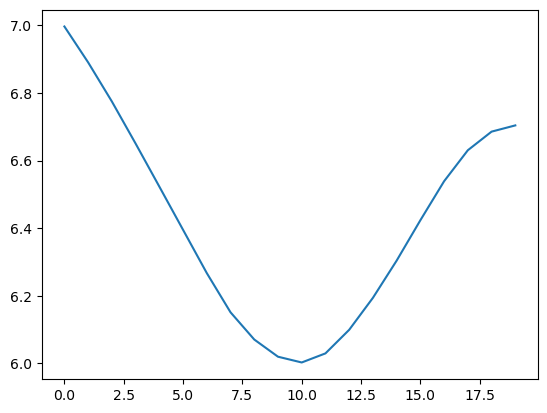

In [15]:
(models.cp_best_stim * df_preds).sum(axis=1).plot()

(0.0, 2.0)

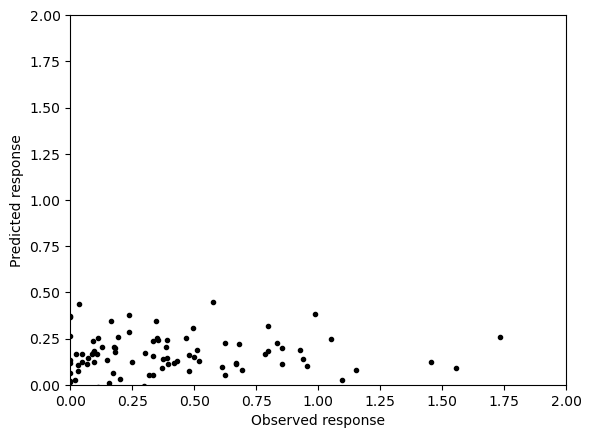

In [16]:
obs, preds = models.cp_best_stim.values, df_preds.iloc[10].values
plt.plot(obs, preds, 'k.')
plt.xlabel('Observed response')
plt.ylabel('Predicted response')

plt.xlim([0, 2])
plt.ylim([0, 2])